# Bibliotecas utilizadas

In [1]:
!pip install unidecode
import unidecode 
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import IFrame
# from google.colab import drive
# drive.mount('/content/drive')

# Entendimento do Negócio

Para produção do bio-redutor para ser utilizado na fábrica para a redução dos minérios inicia-se nas `fazendas` em seus `talhões` temos as florestas com as varias `espécies` de árvores.

Após o corte das florestas as toras ficam `dias secando` em temperatura ambiente, então, ela é transportada para a `UPR` (Unidade de Produção de bio-Redutor).

Uma vez na UPR, o processo inicia-se com a entrada da `madeira` ao forno junto com `tiço enfornado`, pedaço de madeira meio chamuscado que ainda não virou o bio-redutor.

Então é iniciado a processo de pirólise e como produtos temos:
- `Tiço gerado` o qual será utilizado no próximo processo de pirólise no forno entrando como tiço enfornado; e
- Bio-redutor, identificado como `produção` em nossa base de dados.

Com o bio-redutor produzido é feito o levantamento de suas caracteristicas quanto a sua `densidade`, percentual de `finos` (pequenas particulas), `umidade`, `carbono fixo` e `comprimento`.



# Dicionário de Variáveis:
- `Data`: data da coleta de dados;
- `UPR`: unidade de produção de bio-redutor;
- `Fazenda`: local onde tem os talhões;
- `Talhão`: subdivisões da fazenda e local onde são plantadas as árvores;
- `Espécie`: espécie da árvore cultivada;
- `Idade`: idade das árvores (anos); 
- `Dias Secagem`: quantidade de dias que as árvores estão secando ao ar livre;
- `Madeira`: volume estéreo de madeira enfornada (m³);
- `Tiço Enfornado`: volume estéreo de tiço enfornado (m³);
- `Tiço Gerado`: volume estéreo de tiço gerado (m³);
- `Produção`: volume estéreo de bio-redutor (m³);
- `Densidade`: densidade do bio-redutor (kg/m3)
- `Finos`: particulas pequenas presentes no bio-redutor (%);
- `Umidade`: umidade do bio-redutor (%);
- `CF %`: carbono fixo presente no bio-redutor (%);
- `Comprimento`: comprimento do bio-redutor (m)

# Importação dos dados

In [2]:
caminho = 'https://github.com/douglascdsantos/case_maringa/blob/main/base_de_dados.xlsx?raw=true'
dados = pd.read_excel(caminho)
dados.head()

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
0,43466,Maringá,Maringá II,67,-,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03,NaN
1,43466,Maringá,Maringá II,67,-,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03,NaN
2,43466,Maringá,Maringá II,67,-,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03,NaN
3,43466,Maringá,Maringá II,67,-,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03,NaN
4,43466,Maringá,Maringá II,67,-,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03,NaN


# Limpeza dos dados

Além das entrada feitas de maneira incorreta foi analisado os ausentes, constatado em 5 variáveis sendo elas:

In [3]:
dados.isnull().sum()[dados.isnull().sum() > 0]

Dias Secagem       2
Densidade         20
Finos             20
Umidade           20
Comprimento     3613
dtype: int64

## Variável `Data`
Esta iniciamente estava como o formato do excel de data (como 43466"), então, foi passada para o formato datetime do python.

In [4]:
dados['Data'] = [datetime.fromordinal(datetime(1900, 1, 1).toordinal() + excel_data - 2) for excel_data in dados['Data']]
dados.head()

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
0,2019-01-01,Maringá,Maringá II,67,-,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03,NaN
1,2019-01-01,Maringá,Maringá II,67,-,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03,NaN
2,2019-01-01,Maringá,Maringá II,67,-,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03,NaN
3,2019-01-01,Maringá,Maringá II,67,-,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03,NaN
4,2019-01-01,Maringá,Maringá II,67,-,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03,NaN


## Variável `UPR`

Neste temos 6 unidades de produção, não foi necessário tratamento.

In [5]:
dados['UPR'].value_counts()

Tamanduá              1409
Butiá                  762
Maringá                652
Mato Dentro            344
Ribeirão da Ilha       329
Maringá Retangular     235
Name: UPR, dtype: int64

## Variável `Fazenda`

Encontramos que a mesma fazenda está com entradas distintas, como `Alba` e `alba`, vamos deixar todas as entradas minúsculas, remover os acentos para tratar casos como `Maringá II` e `Maringa II` e substituir `Diversos (tocos)` e `Diversos (ticos)` por `ticos`.

In [6]:
print('Entradas únicas', len(dados['Fazenda'].value_counts()))
dados['Fazenda'].value_counts()

Entradas únicas 32


Tamanduá            729
Alba                709
Fecho               604
Butiá               470
Ribeirão da Ilha    316
Itambé              236
Maringá II          122
RFC                 108
Komiya               97
Chaddad              87
Wagner               37
Dona Rita            27
alba                 26
butiá                24
Elizael              20
itambé               15
Diversos (Tiços)     14
Ribeirão da ilha     13
Maringa II           13
Indumine             12
Tiços                11
Butia                 9
Sítio Taquari         9
Taquari               5
indumine              4
Maringá I             4
Diversos (Tocos)      3
Ita Rio (Compra)      2
Sítio Ressaca         2
komiya                1
Ressaca               1
Caviunas              1
Name: Fazenda, dtype: int64

As substituições por semelhança foram feitas e de 32 entradas únicas chegamos a 20.

In [7]:
dados['Fazenda'] = [unidecode.unidecode(entrada.lower()) for entrada in dados['Fazenda']]
fazendas_substituicao = {'ticos':['diversos (ticos)', 'diversos (tocos)'], 'sitio ressaca': 'ressaca', 'sitio taquari': 'taquari'}
for chave in list(fazendas_substituicao.keys()):
  dados['Fazenda'] = [chave if entrada in fazendas_substituicao[chave] else entrada for entrada in dados['Fazenda']]
print('Entradas únicas após tratamento',len(dados['Fazenda'].value_counts()))
dados['Fazenda'] = dados['Fazenda'].astype(str)
dados['Fazenda'].value_counts()

Entradas únicas após tratamento 20


alba                735
tamandua            729
fecho               604
butia               503
ribeirao da ilha    329
itambe              251
maringa ii          135
rfc                 108
komiya               98
chaddad              87
wagner               37
ticos                28
dona rita            27
elizael              20
indumine             16
sitio taquari        14
maringa i             4
sitio ressaca         3
ita rio (compra)      2
caviunas              1
Name: Fazenda, dtype: int64

## Variável `Talhão`

Alguns dos dados que mais se repetem dessa coluna apresentam o nome da fazenda replicada, sem informação de qual talhão se originou.

In [8]:
print('Quantidade de entradas únicas',len(dados['Talhão'].value_counts()))
print('\nTop 10:')
dados['Talhão'].value_counts()[:10]

Quantidade de entradas únicas 248

Top 10:


14         141
27         110
RFC        108
63         105
73         100
24          95
Komiya      93
Chaddad     84
69          82
37          77
Name: Talhão, dtype: int64

Vamos avaliar as entradas que estão diferente do esperado, dentre essas temos muitas que já vimos nos nomes das fazendas, vamos avaliar as espécies de cada uma dessas.

In [9]:
talhao_diferente_int = [type(entrada) != int for entrada in dados['Talhão']]
dados['Talhão'][talhao_diferente_int].value_counts()[:15]

RFC                    108
Komiya                  93
Chaddad                 84
DIV                     43
Wagner                  37
Elizael                 20
Tora                    15
17-100                  14
64-106                  10
2024-11-01 00:00:00     10
DIV.                    10
24-45-46                 8
21-22-106                6
23-24                    6
Diversos (Tiços)         6
Name: Talhão, dtype: int64

Aqui notamos de que não tem alguma espécie especifica, podemos considerar a hipótese de que vieram de fornecedores externo, portanto, é esperado não ter um padrão de talhão como nos outros.

In [10]:
talhao_dict = dict(dados['Talhão'][talhao_diferente_int].value_counts()[:7])
for entrada in list(talhao_dict.keys()):
  print(entrada,'\t', dados.query('Talhão == @entrada')['Espécie'].unique())

RFC 	 [' Diversos ']
Komiya 	 [' -   ' ' Diversos ']
Chaddad 	 [' -   ' ' Diversos ']
DIV 	 [' -   ' ' Semente ' ' Diversos ' '  ']
Wagner 	 [' Diversos ']
Elizael 	 [' Diversos ']
Tora 	 [' -   ' ' Semente ']


Dessa forma vamos tratar todas essas entradas como uma talhão 0 para ficar algo semelhante ao esperado.

In [11]:
dados['Talhão'] = [0 if type(entrada) != int else entrada for entrada in dados['Talhão']]
dados['Talhão'].value_counts()[:15]

0     662
14    141
27    110
63    105
73    100
24     95
69     82
37     77
5      76
75     73
29     69
32     64
15     61
33     59
19     58
Name: Talhão, dtype: int64

## Variável `Espécie`

Nesta coluna temos espaços no inicio e ao final dos textos, também encontramos casos da mesma espécie em caixa alta e baixa.

Quanto a entrada "-" e vazio vamos fazer um substiuição observando o valor mais frequênte da espécie vinda da fazenda de origem de cada caso.

In [12]:
dados['Espécie'].value_counts()

 -                            895
 Clone Saligna 2864           893
 Clone Urograndis 2361        802
 Semente                      438
 Diversos                     297
 Semente Saligna Ecoplant     113
 Clone urograndis 2361         85
 Clone Urograndis I 144        59
 Clone Urograndis GG100        59
 Clone saligna 2864            48
 Semente Saligna ecoplant      16
 semente                       14
 AEC 2034                       6
 Clone Urucam                   3
 Clone Urucam ITAPEVA           2
                                1
Name: Espécie, dtype: int64

Inicialmente foi montado um dicionário para receber o nome da fazenda e a espécie mais frequênte da mesma, para casos em que havia somente "-" vamos tratar com a entrada mais frequênte da variável após esse primeiro tratamento.

In [13]:
especies_faltantes_fazendas = dados.query('Espécie == " -   "')['Fazenda'].unique()
lista_aux = []
for i in [dados.query('Fazenda == @fazenda & Espécie != " -   "')['Espécie'].mode() for fazenda in especies_faltantes_fazendas]:
  if len(i) == 1:
    lista_aux.append(i[0].strip())
  else:
    lista_aux.append("-")

especies_substituicao = dict(zip(especies_faltantes_fazendas,lista_aux))
especies_substituicao

{'alba': 'Clone Urograndis 2361',
 'butia': 'Clone Saligna 2864',
 'chaddad': 'Diversos',
 'dona rita': '-',
 'fecho': 'Clone Saligna 2864',
 'indumine': '-',
 'ita rio (compra)': '-',
 'itambe': 'Semente',
 'komiya': 'Diversos',
 'maringa ii': 'Semente',
 'ribeirao da ilha': 'Semente',
 'sitio taquari': 'Clone Urograndis 2361',
 'tamandua': 'Clone Saligna 2864',
 'ticos': 'Diversos'}

Realizando a substituição dado as condições caso a caso das espécies, quanto aos casos com "-" foram substituidos pela espécie mais recorrente. Sobre a "clone urucam" e "clone urucam itapeva" foi optado por mante-la assim por razão de de que está pois pode haver um distinção como é o caso de clone urograndis em que temos `i 144` e `gg100` e por serem somente 3 entradas.

In [14]:
especie_substituicao_final = []
for entrada in range(dados.shape[0]):
  if entrada in dados.query('Espécie == " -   "').index:
    for fazenda in especies_substituicao.keys():
      if dados['Fazenda'].iloc[entrada] == fazenda:
        especie_substituicao_final.append(especies_substituicao[fazenda])
  else:
    especie_substituicao_final.append(dados['Espécie'].iloc[entrada])
dados['Espécie'] = [entrada.strip().lower() for entrada in especie_substituicao_final]
dados['Espécie'] = [entrada.replace('-',dados['Espécie'].mode()[0]) if entrada != "" else dados['Espécie'].mode()[0] for entrada in dados['Espécie']]

Após o tratamento temos como entradas únicas e suas aparições.

In [15]:
dados['Espécie'].value_counts()

clone saligna 2864          1483
clone urograndis 2361        963
semente                      645
diversos                     382
semente saligna ecoplant     129
clone urograndis i 144        59
clone urograndis gg100        59
aec 2034                       6
clone urucam                   3
clone urucam itapeva           2
Name: Espécie, dtype: int64

## Variável `Idade`

Ao tentar converter todos os dados para valor decimal (float) retornou um erro de que teria algum texto, foi localizado e estava com espaços

In [16]:
idade_texto = (dados['Idade'][[type(entrada) == str for entrada in dados['Idade']]]).index[0]
dados.loc[idade_texto]

Data              2020-09-01 00:00:00
UPR                Maringá Retangular
Fazenda                      caviunas
Talhão                              0
Espécie            clone saligna 2864
Idade                                
Dias Secagem                      NaN
Madeira                           115
Tiço Enfornado                      6
Tiço Gerado                      5.83
Produção                        13.07
Densidade                      243.67
Finos                           10.74
Umidade                          2.58
CF %                            81.26
Comprimento                       NaN
Name: 3249, dtype: object

Para ficar coerente vamos substituir o espaço em branco pela média da idade no da data especifica, sendo 8.54 ao invés de 9.47 que é a média da idade de todos os dados, não foi possível calcular com base na Fazenda uma vez que temos somente uma entrada de "caviunas".

In [17]:
idade_media_periodo = dados[[type(entrada) != str for entrada in dados['Idade']]].query('Data == "2020-09-01"')['Idade'].mean()
print(f'Idade média do período para substituição: {idade_media_periodo:.2f}')
dados['Idade'] = [idade_media_periodo if type(entrada) == str else entrada for entrada in dados['Idade']]
dados['Idade'] = dados['Idade'].astype(float)
dados['Idade'].describe()

Idade média do período para substituição: 8.54


count    3731.000000
mean        9.465041
std         2.636173
min         3.570000
25%         8.160000
50%         9.010000
75%        10.360000
max        37.010000
Name: Idade, dtype: float64

## Variável `Dias Secagem`

Nesta coluna temos 2 dados ausentes, vamos preenche-los com a média

In [18]:
print(f'Entradas ausentes: {dados["Dias Secagem"].isnull().sum()}\n')
dados["Dias Secagem"].fillna(dados["Dias Secagem"].mean(), inplace = True)
dados["Dias Secagem"].describe()

Entradas ausentes: 2



count    3731.000000
mean      259.692947
std       131.431191
min         3.000000
25%       173.000000
50%       236.000000
75%       320.000000
max      1115.000000
Name: Dias Secagem, dtype: float64

In [19]:
dados["Dias Secagem"].mean()

259.6929471708233

##  Variável `Madeira`

Aqui temos um valor faltante registrado como " -   "

In [20]:
dados['Madeira'].value_counts()

 -        30
34.87      7
105        7
110        5
32         5
          ..
111.73     1
56.44      1
164.76     1
149.51     1
101.54     1
Name: Madeira, Length: 3222, dtype: int64

Para realizar o tratamento da quantidade de madeira enfornada representada por "-" não iremos pegar a média do período como feito anteriormente, pois como vimos na parte de **entendimento do negócio** para a pirólise no forno é feito um mix de madeira e tiço, como o tiço já passou por um ciclo anterior então o mesmo possui uma menor umidade, dessa forma facilitando a combustão do mix.


In [21]:
dados.query('Madeira == " -   "')

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
1756,2019-10-01,Maringá,ticos,0,diversos,11.55,598.0,-,42,1,6.90,248.33,9.78,3.92,77.17,NaN
1802,2019-10-01,Tamanduá,ticos,0,diversos,11.55,604.0,-,39.04,4,8.87,253.60,10.31,4.33,75.83,NaN
1807,2019-10-01,Tamanduá,ticos,0,diversos,11.55,605.0,-,39.1,4.89,7.57,253.60,10.31,4.33,75.83,NaN
1811,2019-10-01,Tamanduá,ticos,0,diversos,11.55,606.0,-,38.56,3.43,7.76,253.60,10.31,4.33,75.83,NaN
1814,2019-10-01,Tamanduá,ticos,0,diversos,11.55,607.0,-,77.41,6.78,12.97,253.60,10.31,4.33,75.83,NaN
1818,2019-10-01,Tamanduá,ticos,0,diversos,11.55,608.0,-,38.5,4.98,7.24,253.60,10.31,4.33,75.83,NaN
1821,2019-10-01,Tamanduá,ticos,0,diversos,11.55,611.0,-,39,5.21,8.34,253.60,10.31,4.33,75.83,NaN
1831,2019-10-01,Tamanduá,ticos,0,diversos,11.55,613.0,-,38.98,3,7.58,253.60,10.31,4.33,75.83,NaN
1837,2019-10-01,Tamanduá,ticos,0,diversos,11.55,614.0,-,38.26,3.12,7.96,253.60,10.31,4.33,75.83,NaN
1841,2019-10-01,Tamanduá,ticos,0,diversos,11.55,615.0,-,115.67,9.88,23.32,253.60,10.31,4.33,75.83,NaN


Com base nessas informações podemos especular uma proporcionalidade de madeira para tiço, vamos fazer uma seleção dos dados com base nos dados estatisticos da nossa amostra pegando valores entre 38.59 a 41.32 (intervalo no qual temos 50% dos dados da nossa amostra), foi optado por não usar a média e o desvio padrão por conta de uma entrada de 115.67, não que seja um outlier declarado pois a quantidade de tiço gerado está aparentemente seguindo uma proporção.

Tamanho da seleção: 30

Medidas de posição e dispersão:
count     30.000000
mean      48.029000
std       19.276925
min       36.980000
25%       38.587500
50%       39.020000
75%       41.315000
max      115.670000
Name: Tiço Enfornado, dtype: float64

Histograma Tiço Enfornado


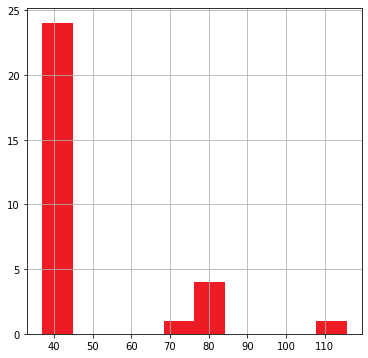

In [22]:
madeira_ausentes = dados.query('Madeira == " -   "')['Tiço Enfornado'].astype(float)
madeira_intervalo_inf = madeira_ausentes.quantile(.25)
madeira_intervalo_sup = madeira_ausentes.quantile(.75)

def mostrar_metricas_hist(dados,titulo):
  print(f'Tamanho da seleção: {len(dados)}\n')
  print(f"Medidas de posição e dispersão:\n{dados.describe()}\n\nHistograma {titulo}")
  dados.hist(color = '#ED1C24',figsize=(6,6));

mostrar_metricas_hist(madeira_ausentes,'Tiço Enfornado')

Iniciamos fazendo uma seleção da base de dados em que a variável Tiço enfornado esteja entre 38.59 a 41.32, dessa forma temos as medidas estatísticas e o histograma da seleção, podemos notar de que a distribuição segue uma normal deslocada a esquerda, dado isso e o espaço amostral ser pequeno vamos optar por utilizar a mediana no valor de 231.54 para substituição.

Tamanho da seleção: 46

Medidas de posição e dispersão:
count     46.000000
mean     267.877826
std       82.995900
min      142.380000
25%      193.880000
50%      231.535000
75%      333.137500
max      507.910000
Name: Madeira, dtype: float64

Histograma Madeira


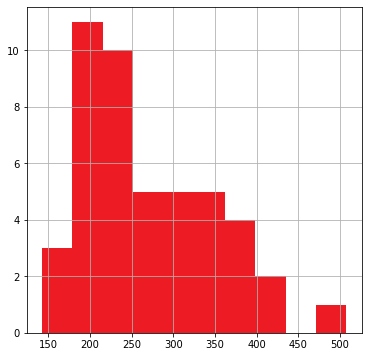

In [23]:
selecao_madeira = dados.query('`Tiço Enfornado` != " -   "')
selecao_madeira_filtrada = selecao_madeira.query('`Tiço Enfornado` >= @madeira_intervalo_inf & `Tiço Enfornado` <= @madeira_intervalo_sup & Madeira != " -   "').copy()
selecao_madeira_filtrada['Madeira'] = selecao_madeira_filtrada['Madeira'].astype(float)
# print(f'Tamanho da seleção: {len(selecao_madeira_filtrada["Madeira"])}\n')
# print(f"Medidas de posição e dispersão:\n{selecao_madeira_filtrada['Madeira'].describe()}\n\nHistograma Madeira")
# selecao_madeira_filtrada['Madeira'].hist(color = '#ED1C24',figsize=(6,6));
mostrar_metricas_hist(selecao_madeira_filtrada["Madeira"],'Madeira')

Concluimos o tratamento dessa variável, ficando dessa maneira.

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3731.000000
mean      185.772150
std       140.870987
min         2.000000
25%        82.530000
50%       156.930000
75%       225.190000
max      1077.070000
Name: Madeira, dtype: float64

Histograma Madeira pós tratamento


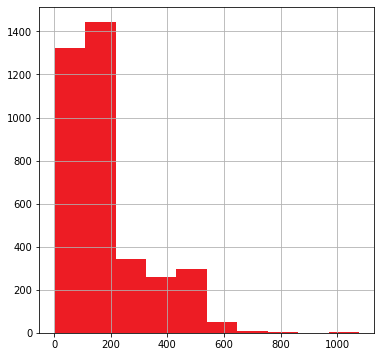

In [24]:
dados['Madeira'] = [selecao_madeira_filtrada['Madeira'].median() if entrada in dados.query('Madeira == " -   "').index else dados['Madeira'].iloc[entrada] for entrada in range(len(dados['Madeira']))]
mostrar_metricas_hist(dados['Madeira'],'Madeira pós tratamento')

## Variável Tiço Enfornado

Nesta variável temos um caso semelhante ao anterior,vamos trabalhar com as mesmas considerações dado o entendimento do negócio.

In [25]:
dados.query('`Tiço Enfornado` == " -   "')

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
37,2019-01-01,Tamanduá,tamandua,43,clone saligna 2864,8.64,229.0,34.54,-,4,4.84,265.77,12.49,6.08,75.47,NaN
169,2019-02-01,Maringá Retangular,maringa ii,0,semente,11.91,154.0,79.50,-,2.5,7.88,272.59,11.03,6.97,81.52,NaN
171,2019-02-01,Maringá Retangular,maringa ii,0,semente,11.91,162.0,109.53,-,1.5,12.09,272.59,11.03,6.97,81.52,NaN
173,2019-02-01,Maringá Retangular,maringa ii,0,semente,11.91,170.0,70.33,-,1.5,7.44,272.59,11.03,6.97,81.52,NaN
310,2019-03-01,Maringá,ticos,0,diversos,8.02,122.0,41.00,-,2.5,5.49,249.38,11.37,4.42,77.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,2020-10-01,Maringá Retangular,alba,27,clone urograndis 2361,7.82,343.0,108.50,-,9.32,12.34,242.05,10.88,4.06,82.41,5
3387,2020-10-01,Maringá Retangular,alba,27,clone urograndis 2361,7.82,351.0,122.11,-,7.38,12.53,242.05,10.88,4.06,82.41,3.3
3406,2020-10-01,Tamanduá,fecho,71,clone saligna 2864,7.88,313.0,38.76,-,4.95,4.16,244.52,10.67,5.20,75.95,NaN
3526,2020-11-01,Maringá Retangular,alba,27,clone urograndis 2361,7.82,363.0,89.54,-,6.97,11.66,246.22,9.80,4.03,79.24,5.5


Ao avaliar o comportamento da madeira para a preenchimento dos dados de tiço notamos 2 concentrações de dados, para avaliar o valor de tiço enfornado de maneira mais precisa vamos fazer um segmentação em 85 e avaliar cada parte separada.

Tamanho da seleção: 921

Medidas de posição e dispersão:
count    921.000000
mean      84.600369
std       19.012625
min       39.210000
25%       68.530000
50%       81.430000
75%      103.000000
max      115.000000
Name: Madeira, dtype: float64

Histograma Madeira da seleção


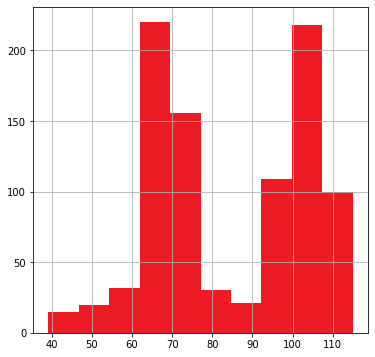

In [26]:
tico_enf_lim_inf = dados.query('`Tiço Enfornado` == " -   "')['Madeira'].quantile(.25)
tico_enf_lim_sup = dados.query('`Tiço Enfornado` == " -   "')['Madeira'].quantile(.75)
selecao_madeira = dados.query('Madeira >= @tico_enf_lim_inf & Madeira <= @tico_enf_lim_sup')
selecao_madeira = selecao_madeira.query('`Tiço Enfornado` != " -   "').copy()
selecao_madeira['Tiço Enfornado'] = selecao_madeira['Tiço Enfornado'].astype(float)
mostrar_metricas_hist(selecao_madeira['Madeira'], 'Madeira da seleção')

Notamos que o valor médio de tiço enfornado para quando Madeira está abaixo de 85 está 7.59 e quando está acima de 85 temos 11.75, vamos seguir com esses valores para substituição

In [27]:
print(f"""Avaliando Tiço enfornado para Madedeira < 85\n{selecao_madeira.query('Madeira < 85')['Tiço Enfornado'].describe()}\n\n
Avaliando Tiço enfornado para Madedeira >= 85\n{selecao_madeira.query('Madeira >= 85')['Tiço Enfornado'].describe()}""")

Avaliando Tiço enfornado para Madedeira < 85
count    473.000000
mean       7.588710
std        3.374759
min        0.400000
25%        5.870000
50%        7.560000
75%        9.080000
max       20.500000
Name: Tiço Enfornado, dtype: float64


Avaliando Tiço enfornado para Madedeira >= 85
count    448.000000
mean      11.753973
std        4.861053
min        0.800000
25%        8.900000
50%       11.515000
75%       14.505000
max       26.400000
Name: Tiço Enfornado, dtype: float64


Realizando a subsituição dada a condição vista acima.

In [28]:
lista_tico_enfornado = []
for entrada in range(dados.shape[0]):
  if entrada in dados.query('`Tiço Enfornado` == " -   "').index:
    if dados['Madeira'].iloc[entrada] < 85:
      lista_tico_enfornado.append(selecao_madeira.query('Madeira < 85')['Tiço Enfornado'].mean())
    else:
      lista_tico_enfornado.append(selecao_madeira.query('Madeira >= 85')['Tiço Enfornado'].mean())
  else:
    lista_tico_enfornado.append(dados['Tiço Enfornado'].iloc[entrada])
dados['Tiço Enfornado'] = lista_tico_enfornado

Com isso concluimos o tratamento dos tiços enfornados, temos aqui as medidas de posição e dispersão desses dados

In [29]:
dados['Tiço Enfornado'].describe()

count    3731.000000
mean       25.723119
std        24.629469
min         0.250000
25%         8.705000
50%        17.820000
75%        31.555000
max       165.430000
Name: Tiço Enfornado, dtype: float64

## Variável Tiço Gerado

Aqui encontramos mais um caso como os anteriores, considerando que o tiço gerado é proveniente somente da madeira, podemos trabalhar com um percentural de tiço gerado para realizarmos o preenchimento.

In [30]:
dados.query('`Tiço Gerado` == " -   "')

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
170,2019-02-01,Maringá Retangular,maringa ii,0,semente,11.91,160.0,68.830,3.000000,-,8.18,272.59,11.03,6.97,81.52,NaN
500,2019-04-01,Maringá Retangular,maringa ii,0,semente,11.13,290.0,63.000,1.500000,-,8.16,225.29,10.63,3.08,80.22,NaN
682,2019-05-01,Maringá Retangular,maringa ii,45,semente,10.39,401.0,65.350,2.000000,-,7.36,266.64,11.21,7.47,85.37,NaN
685,2019-05-01,Maringá Retangular,maringa ii,0,semente,12.07,194.0,68.910,7.588710,-,8.62,266.64,11.21,7.47,85.37,NaN
1481,2019-08-01,Butiá,butia,73,clone urograndis 2361,7.29,344.0,34.600,7.588710,-,2.75,238.91,9.69,4.87,77.48,NaN
1483,2019-08-01,Butiá,butia,73,clone urograndis 2361,7.29,345.0,36.870,7.588710,-,2.47,238.91,9.69,4.87,77.48,NaN
1490,2019-08-01,Butiá,butia,73,clone urograndis 2361,7.29,351.0,13.000,7.588710,-,1.30,238.91,9.69,4.87,77.48,NaN
1677,2019-09-01,Butiá,butia,73,clone urograndis 2361,7.29,356.0,24.680,7.588710,-,3.23,245.75,9.92,4.12,75.56,NaN
1678,2019-09-01,Butiá,butia,73,clone urograndis 2361,7.29,357.0,78.130,7.588710,-,6.84,245.75,9.92,4.12,75.56,NaN
1681,2019-09-01,Butiá,butia,73,clone urograndis 2361,7.29,357.0,55.500,7.588710,-,4.84,245.75,9.92,4.12,75.56,NaN


O histograma a baixo mostra o quociente de tiço gerado por madeira, vamos utilizar a mediana novamente para a substituição.

Tamanho da seleção: 3711

Medidas de posição e dispersão:
count     3711.000000
unique    3565.000000
top          0.114712
freq         6.000000
dtype: float64

Histograma tiço gerado / madeira


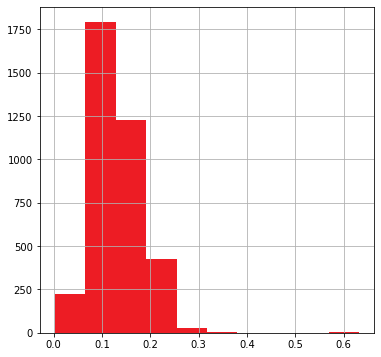

In [31]:
mostrar_metricas_hist(dados.query('`Tiço Gerado` != " -   "')['Tiço Gerado'] / dados.query('`Tiço Gerado` != " -   "')['Madeira'],'tiço gerado / madeira')

Substituição concluída

In [32]:
dados['Tiço Gerado'] = [(dados.query('`Tiço Gerado` != " -   "')['Tiço Gerado'] / dados.query('`Tiço Gerado` != " -   "')['Madeira']).median() if entrada == " -   " else entrada for entrada in dados['Tiço Gerado']]
dados['Tiço Gerado'].describe()

count    3731.000000
mean       25.932886
std        25.092590
min         0.122937
25%         8.525000
50%        18.000000
75%        32.070000
max       180.270000
Name: Tiço Gerado, dtype: float64

## Variável `Produção`

Nesta variável não foi necessário tratamento

In [33]:
dados['Produção'].describe()

count    3731.000000
mean       21.187296
std        17.686824
min         0.410000
25%         8.885000
50%        16.370000
75%        25.050000
max       135.740000
Name: Produção, dtype: float64

## Variável `Densidade`

Encontramos valores iguais a zero, o quais não fazem sentido, vamos passar eles para ausentes e fazer o tratamento de uma vez.

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3711.000000
mean      247.783269
std        16.662546
min         0.000000
25%       241.710000
50%       247.370000
75%       254.940000
max       272.630000
Name: Densidade, dtype: float64

Histograma densidade


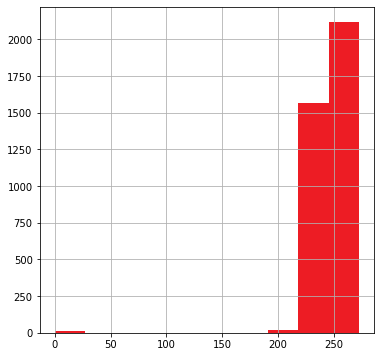

In [34]:
mostrar_metricas_hist(dados['Densidade'],"densidade")

In [35]:
print('valor média abaixo de 50:',dados[dados['Densidade'] <50]['Densidade'].mean())

valor média abaixo de 50: 0.0


Utilizando-se da média, pois segue uma distribuição normal sem presença de possíveis outliers, para a substituição dos valores ausentes

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3700.000000
mean      248.519922
std         9.764407
min       212.660000
25%       241.710000
50%       247.370000
75%       254.940000
max       272.630000
Name: Densidade, dtype: float64

Histograma densidade sem zeros


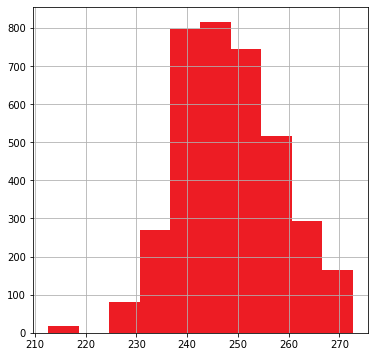

In [36]:
dados['Densidade'] = [np.nan if entrada == 0 else entrada for entrada in dados['Densidade']]
mostrar_metricas_hist(dados['Densidade'],"densidade sem zeros")

In [37]:
dados['Densidade'].fillna(dados['Densidade'].mean(), inplace = True)
print("quantidade de valores ausentes pós tratamento:",dados['Densidade'].isnull().sum())

quantidade de valores ausentes pós tratamento: 0


## Variável `Finos`

Seguimos o mesmo pensamento da variável anterior

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3711.000000
mean       10.612614
std         0.872033
min         0.000000
25%        10.240000
50%        10.630000
75%        10.960000
max        14.080000
Name: Finos, dtype: float64

Histograma finos bruto


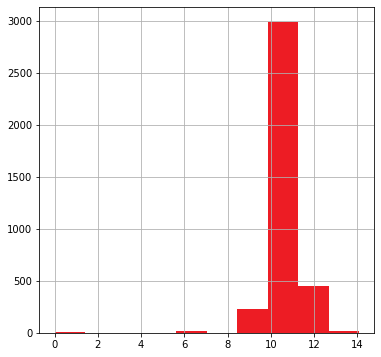

In [38]:
mostrar_metricas_hist(dados['Finos'],'finos bruto')

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3731.000000
mean       10.644165
std         0.650562
min         6.700000
25%        10.270000
50%        10.630000
75%        10.960000
max        14.080000
Name: Finos, dtype: float64

Histograma finos tratado


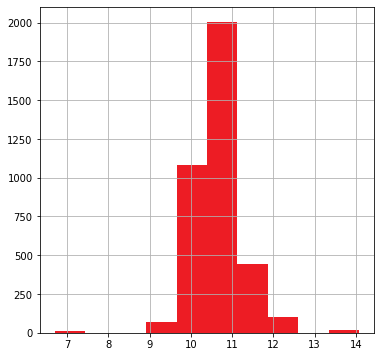

In [39]:
dados['Finos'] = [np.nan if entrada == 0 else entrada for entrada in dados['Finos']]
dados['Finos'].fillna(dados['Finos'].mean(), inplace = True)
mostrar_metricas_hist(dados['Finos'],'finos tratado')

## Variável `Umidade`:

Seguimos o mesmo pensamento da variável anterior

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3711.000000
mean        5.209510
std         1.042252
min         0.000000
25%         4.470000
50%         5.160000
75%         5.790000
max         9.910000
Name: Umidade, dtype: float64

Histograma umidade bruto


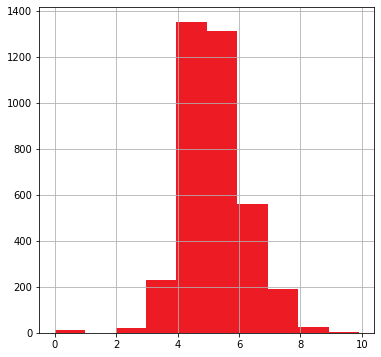

In [40]:
mostrar_metricas_hist(dados['Umidade'],'umidade bruto')

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3731.000000
mean        5.224997
std         1.000096
min         2.580000
25%         4.490000
50%         5.190000
75%         5.790000
max         9.910000
Name: Umidade, dtype: float64

Histograma Umidade tratado


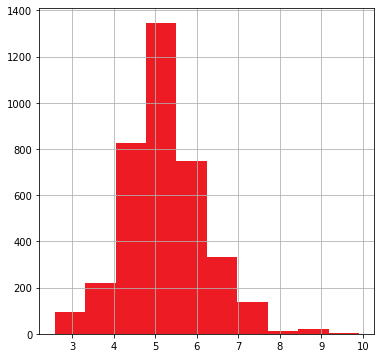

In [41]:
dados['Umidade'] = [np.nan if entrada == 0 else entrada for entrada in dados['Umidade']]
dados['Umidade'].fillna(dados['Umidade'].mean(), inplace = True)
mostrar_metricas_hist(dados['Umidade'],'Umidade tratado')

## Variável `CF %`

Não foi necessário tratamento.

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3731.000000
mean       77.604522
std         2.270390
min        71.500000
25%        75.940000
50%        77.110000
75%        79.390000
max        89.110000
Name: CF %, dtype: float64

Histograma CF %


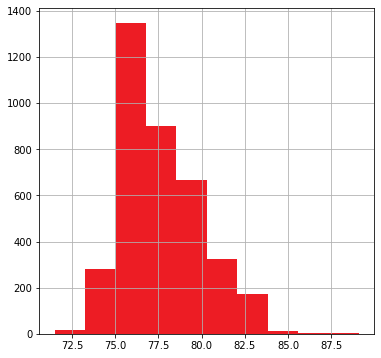

In [42]:
mostrar_metricas_hist(dados['CF %'],'CF %')

## Variável `Comprimento`

Nesta variável encontramos entradas como texto e comentarios, foram todos tratados.

Tamanho da seleção: 3731

Medidas de posição e dispersão:
count    3731.000000
mean        3.316323
std         0.185634
min         3.000000
25%         3.300000
50%         3.300000
75%         3.300000
max         5.500000
Name: Comprimento, dtype: float64

Histograma Comprimento


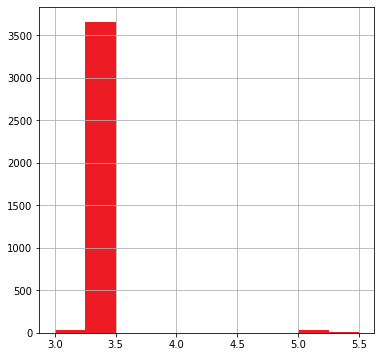

In [43]:
comprimento_subs = dict(zip(['*Consumo dos fornos de sexta e de quinta que ficaram pata trás', '5,0m', '3,3m', 'Estimado'],[np.nan, 5, 3.3, np.nan]))

lista = []
for entrada in dados['Comprimento']:
  if entrada in comprimento_subs.keys():
    lista.append(comprimento_subs[entrada])
  else:
    lista.append(entrada)
dados['Comprimento'] = lista

ausente = dados['Comprimento'][0]
dados['Comprimento'] = [dados['Comprimento'].mode() if entrada == ausente else entrada for entrada in dados['Comprimento']]
dados['Comprimento'].fillna(float(dados['Comprimento'].mode()), inplace = True)

mostrar_metricas_hist(dados['Comprimento'],'Comprimento')

# Exportando Dados

Foi conservado o formato do arquivo com os dados de entrada.

In [44]:
dados.to_excel('/content/base_de_dados_tratado.xlsx', index = False)

# Visualização dos Dados

Nesta parte utilizamos dos dados tratados no PowerBi, para visualizar clique na imagem abaixo.

In [45]:
powerBiEmbed = 'https://app.powerbi.com/view?r=eyJrIjoiYTg0ZTAwYmMtYWZjMS00NGRmLThmMjctNDZiY2VkOGI5MzU0IiwidCI6ImZlODc4N2JjLWM5MTQtNDY2NS04NTQ3LTI2OGUxNWNiMGQ5YSJ9&pageName=ReportSection'
IFrame(powerBiEmbed, width = 1280, height = 720)

# Referências Bibliográficas:
- BRITO, J. O. et al. Análise da produção energética e de carvão vegetal de espécies de eucalipto. IPEF, Piracicaba, v. 23, p. 53-56, 1983.
, acessado em 19 de fevereiro de 2022 disponível em https://www.ipef.br/publicacoes/scientia/nr23/cap08.pdf